In [1]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('sgart.json',encoding="utf8") as json_file:
    data = json.load(json_file)
    
df = json_normalize(data['GraphImages'])
df = df.loc[df.astype(str).drop_duplicates().index]
print(df.shape)
df.head()

(50000, 18)


,display_url,id,is_video,shortcode,tags,taken_at_timestamp,thumbnail_resources,thumbnail_src,urls,dimensions.height,dimensions.width,edge_liked_by.count,edge_media_preview_like.count,edge_media_to_caption.edges,edge_media_to_comment.count,owner.id,comments_disabled,video_view_count
0,https://instagram.fsin9-2.fna.fbcdn.net/v/t51....,2259395302908172425,False,B9a_A6lBxiJ,[],1583560930,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fsin9-2.fna.fbcdn.net/v/t51....,[https://instagram.fsin9-2.fna.fbcdn.net/v/t51...,1080,1080,7686,7686,"[{'node': {'text': '• close • 〰️ ""It was just ...",60,1174252915,NaN,NaN
1,https://instagram.fsin9-1.fna.fbcdn.net/v/t51....,2260370323433446957,False,B9ectVNFd4t,"[igartist, digitalcollage, artist, collage, ph...",1583677162,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fsin9-1.fna.fbcdn.net/v/t51....,[https://instagram.fsin9-1.fna.fbcdn.net/v/t51...,1080,1080,1193,1555,[{'node': {'text': 'Already picturing my monda...,24,1950750,NaN,NaN
2,https://instagram.fsin9-2.fna.fbcdn.net/v/t51....,2262572436607530534,False,B9mRaS6lPYm,"[sgartist, arthistory, digitalart, photoshop, ...",1583939674,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fsin9-2.fna.fbcdn.net/v/t51....,[https://instagram.fsin9-2.fna.fbcdn.net/v/t51...,1080,1080,152,152,[{'node': {'text': 'Balik kampung sis. Thanks ...,1,1950750,NaN,NaN
3,https://instagram.fsin9-2.fna.fbcdn.net/v/t51....,2261689348457894371,False,B9jInq_HhHj,[],1583834402,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fsin9-2.fna.fbcdn.net/v/t51....,[https://instagram.fsin9-2.fna.fbcdn.net/v/t51...,1080,1080,140,140,[{'node': {'text': '“What day is it?” “It’s to...,21,11806415428,NaN,NaN
4,https://instagram.fsin9-2.fna.fbcdn.net/v/t51....,2258010429208838206,False,B9WEIWcHsA-,[],1583395840,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fsin9-2.fna.fbcdn.net/v/t51....,[https://instagram.fsin9-2.fna.fbcdn.net/v/t51...,1350,1080,524,668,[{'node': {'text': 'Quilled: Blush In celebra...,16,5666093988,NaN,NaN


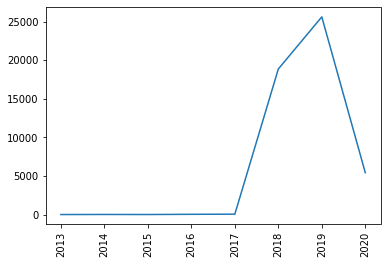

In [2]:
df['taken_at_timestamp'] = pd.to_datetime(df['taken_at_timestamp'],unit='s')
df['date_taken_at_timestamp'] = df['taken_at_timestamp'].dt.date
df['year_taken_at_timestamp'] = df['taken_at_timestamp'].dt.year

df_daily = df.groupby('year_taken_at_timestamp').agg({'id' :'count'}).reset_index()
df_daily.head()


#We can see theres a rising trend in the hashtag use over the years (find out why theres the spike and why we should use this tag to track)
plt.plot(df_daily['year_taken_at_timestamp'], df_daily['id'])
a = plt.xticks(rotation=90)
plt.show()

In [3]:
#which hashtags are mentioned the most
#number of comment and likes

C:\Users\Junrong\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


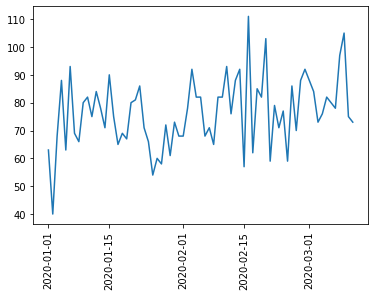

In [4]:
df_2020 = df[df['year_taken_at_timestamp']==2020]
df_daily = df_2020.groupby('date_taken_at_timestamp').agg({'id' :'count'}).reset_index()
df_daily.head()

#Number of posts over the days (2020). We cant see any obvious spikes in posts.
plt.plot(df_daily['date_taken_at_timestamp'], df_daily['id'])
a = plt.xticks(rotation=90)
plt.show()

In [5]:
df = df[df['tags'].map(str) != 'nan']
tags_list = [tag for tag_list in df['tags'][df['year_taken_at_timestamp'].astype(str) =='2020'].values.tolist() if str(tag_list) != 'nan'  for tag in tag_list ]

In [6]:
import collections
counter = collections.Counter(tags_list)
hashtag_df = pd.DataFrame(counter.most_common(),columns=['hashtag','count'])
hashtag_df = hashtag_df[~hashtag_df['hashtag'].isin(['sgart','art','sgartist','artist','singapore','singaporeart','artistsoninstagram','artwork','instaart','singaporeartist','sg','artsg'])]
hashtag_df = hashtag_df.sort_values(by=['count'],ascending=False)[:10]
hashtag_df

,hashtag,count
3,illustration,854
6,drawing,666
11,sketch,561
12,digitalart,468
13,artoftheday,393
15,painting,330
16,procreate,300
19,contemporaryart,275
20,ink,264
21,sgig,257


In [7]:
hashtag_list = hashtag_df['hashtag'].tolist()[:10]
# for hashtag in hashtag_list:
hashtag_df['likes'] = [df['edge_liked_by.count'][ df['tags'].astype(str).str.contains(hashtag)].sum() for hashtag in hashtag_list]
hashtag_df['comments'] = [df['edge_media_to_comment.count'][ df['tags'].astype(str).str.contains(hashtag)].sum() for hashtag in hashtag_list]
hashtag_df.sort_values(by=['likes','comments','count'],ascending=False)

,hashtag,count,likes,comments
3,illustration,854,1522181,37928
15,painting,330,1233989,31046
6,drawing,666,816045,27349
11,sketch,561,735395,15284
13,artoftheday,393,564379,9747
20,ink,264,524097,15208
12,digitalart,468,259670,9582
21,sgig,257,236371,8366
19,contemporaryart,275,222064,6787
16,procreate,300,132582,4952


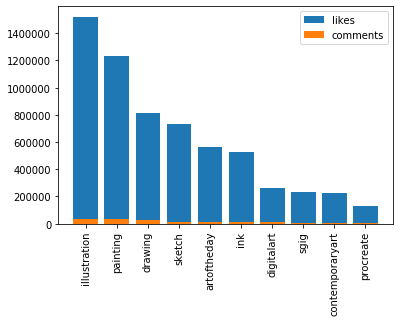

In [8]:
hashtag_df = hashtag_df.sort_values(by=['likes','comments','count'],ascending=False)
# hashtag_df.plot(kind='bar', stacked=True)

barWidth = 0.25
r1 = np.arange(len(hashtag_df['likes']))
r2 = [x + barWidth for x in r1]


plt.bar(r1,hashtag_df['likes'], label='likes')
plt.bar(r1,hashtag_df['comments'], label='comments')
locs, labels=plt.xticks()
plt.xticks([r for r in range(len(hashtag_df))],hashtag_df['hashtag'],rotation=90)
# Create legend & Show graphic
plt.legend()
plt.show()

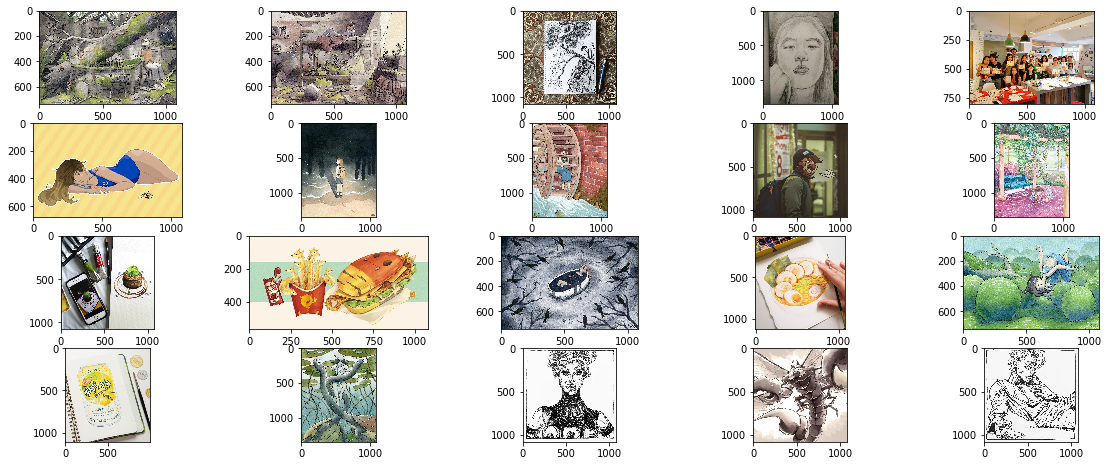

In [22]:
#show images from each of the top 3 hashtags: Illustration
from skimage import io
import matplotlib.pyplot as plt
mask = df['tags'].apply(lambda x: hashtag_df['hashtag'].iloc[0] in x)

plt.figure(figsize=(20,10))
columns = 5

#random sample 20 images
sample_df = df[mask].sort_values(by=['edge_liked_by.count','edge_media_to_comment.count'],ascending=False).iloc[:20]

for i, image in enumerate(sample_df['display_url'].values):
    plt.subplot(len(sample_df) / columns + 1, columns, i + 1)
    try:
        image = io.imread(image)
        plt.imshow(image)
    except:
        image = io.imread(df['display_url'][mask].sample(n=1).values[0])
        plt.imshow(image)

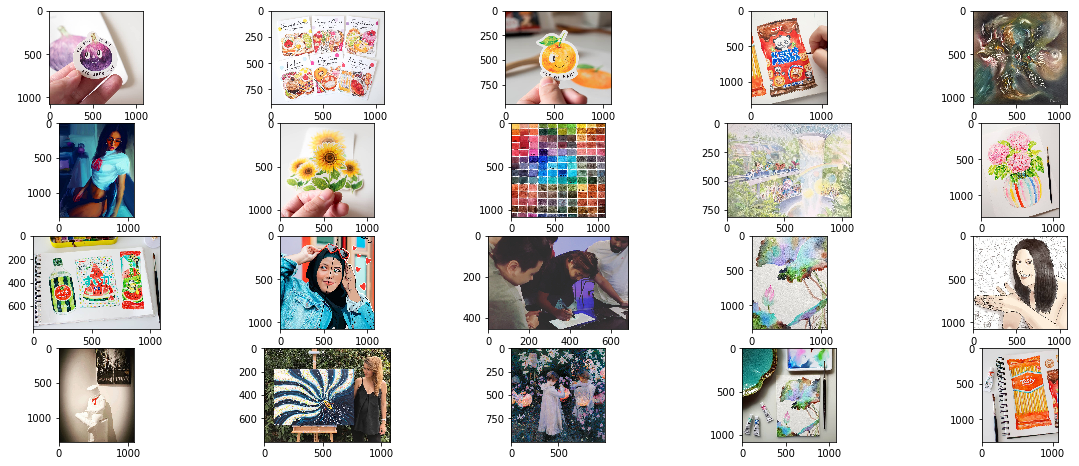

In [23]:
#show images from each of the top 3 hashtags: Painting
from skimage import io
import matplotlib.pyplot as plt
mask = df['tags'].apply(lambda x: hashtag_df['hashtag'].iloc[1] in x)

plt.figure(figsize=(20,10))
columns = 5

#random sample 20 images
sample_df = df[mask].sort_values(by=['edge_liked_by.count','edge_media_to_comment.count'],ascending=False).iloc[:20]

for i, image in enumerate(sample_df['display_url'].values):
    plt.subplot(len(sample_df) / columns + 1, columns, i + 1)
    try:
        image = io.imread(image)
        plt.imshow(image)
    except:
        image = io.imread(df['display_url'][mask].sample(n=1).values[0])
        plt.imshow(image)

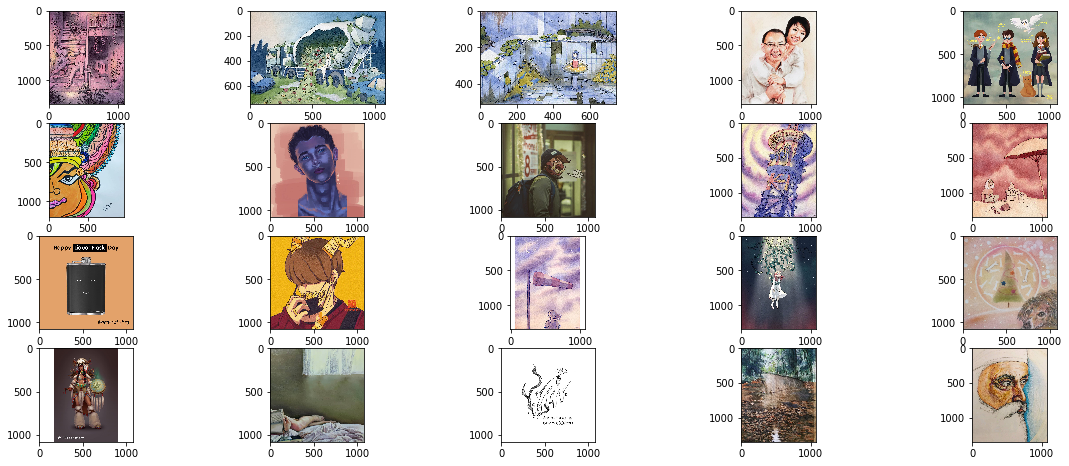

In [24]:
#show images from each of the top 3 hashtags: drawing
from skimage import io
import matplotlib.pyplot as plt
mask = df['tags'].apply(lambda x: hashtag_df['hashtag'].iloc[2] in x)

plt.figure(figsize=(20,10))
columns = 5

#random sample 20 images
sample_df = df[mask].sort_values(by=['edge_liked_by.count','edge_media_to_comment.count'],ascending=False).iloc[:20]

for i, image in enumerate(sample_df['display_url'].values):
    plt.subplot(len(sample_df) / columns + 1, columns, i + 1)
    try:
        image = io.imread(image)
        plt.imshow(image)
    except:
        image = io.imread(df['display_url'][mask].sample(n=1).values[0])
        plt.imshow(image)